In [2]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def Gauss(x, A, mean, std):
  gauss = A*np.exp(-(x-mean)**2/(2*std**2))
  return gauss

In [177]:
file = up.open("mip test 12_4_24/DataR_CH1@V2740B_22575_Amp55_2mV_risetime3us_Board100.root")
file.classnames()

{'Data_R;5': 'TTree', 'Data_R;4': 'TTree'}

In [178]:
tree = file["Data_R;5"]
branch = tree["Energy"]
data = branch.arrays()

In [179]:
energy = []
for val in data:
    if val["Energy"] >= 800 and val["Energy"] <= 1500:
        energy.append(val["Energy"])

energy = np.array(energy)

(0.0, 400.0)

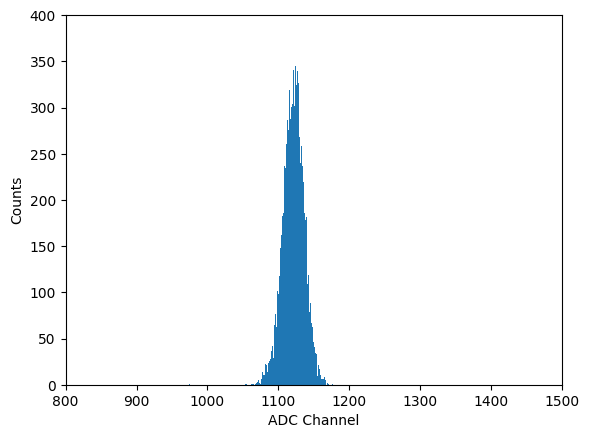

In [180]:
bin = np.linspace(0, 32766, 32766)
n, bins, patches = plt.hist(energy, bins=bin)
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
plt.xlim(800, 1500)
plt.ylim(0, 400)

In [181]:
popt, pcov = curve_fit(Gauss, bin[0:32765], n, p0=[300, 1100, 10])
print(popt)
print(np.sqrt(np.diag(pcov)))

[ 331.3073405  1121.64667649   14.37712916]
[0.16472239 0.00825396 0.00825396]


13.246207148725762


Text(0.5, 1.0, 'Rise time 13 $\\mu s$')

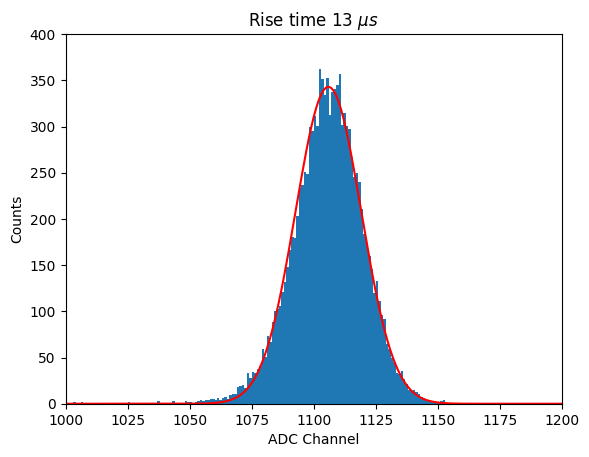

In [83]:
plt.plot(bin[0:32765], Gauss(bin[0:32765], *popt), color="red")
n2, b2, p2 = plt.hist(energy, bins=bin[0:32765])
print(popt[2])
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
plt.xlim(1000, 1200)
plt.ylim(0, 400)
plt.title(r"Rise time 13 $\mu s$")

In [70]:
stdev_array = np.array([14.36, 13.83, 13.69, 13.43, 13.68, 13.32, 13.43, 13.58, 13.25])
stdev_err_array = np.array([0.009, 0.009, 0.006, 0.007, 0.008, 0.009, 0.007, 0.008, 0.006])
FWHM_array = 2.35*stdev_array
FWHM_err_array = 2.35*stdev_err_array
rise_time_array = np.array([3, 5, 7, 8, 9, 10, 11, 12, 13])

### Some graphs + results

1. Rise time 3 $\mu s$

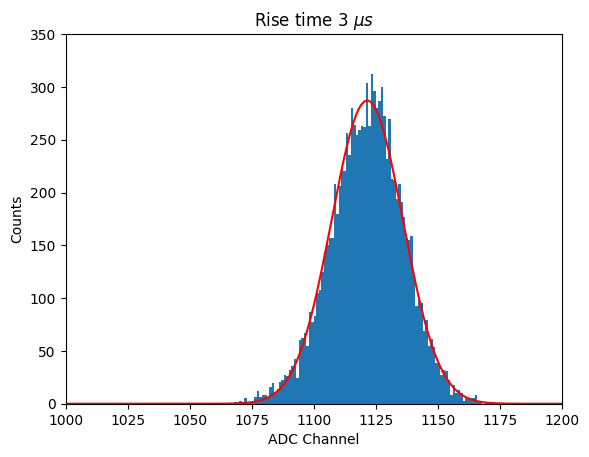

Peak value = 1121.65 ADC

Stdev = 14.36 $\pm$ 0.009 ADC

2. Rise time 5 $\mu s$

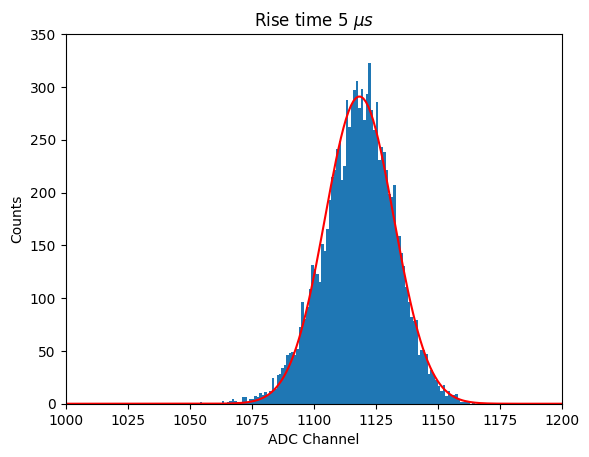

Peak value = 1118.33 ADC

Stdev = 13.83 $\pm$ 0.009 ADC

3. Rise time 7 $\mu s$

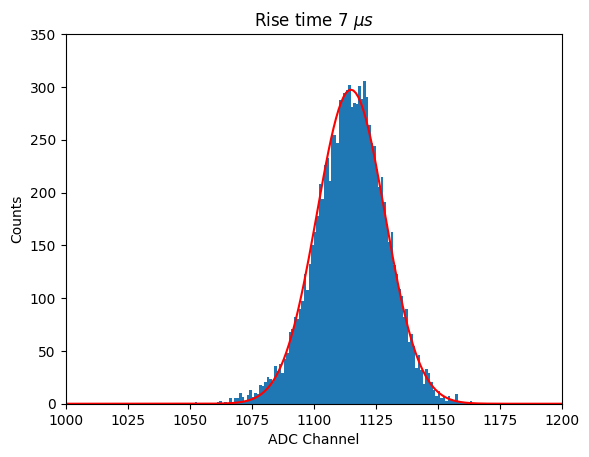

Peak value = 1115.12 ADC

Stdev = 13.69 $\pm$ 0.006 ADC

4. Rise time 8 $\mu s$

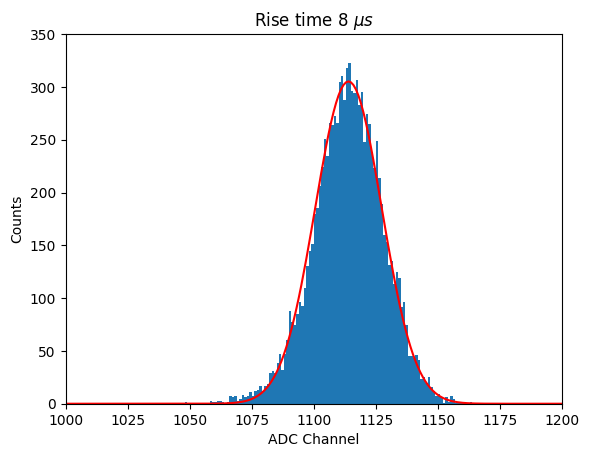

Peak value = 1114.05 ADC

Stdev = 13.43 $\pm$ 0.007 ADC

5. Rise time 9 $\mu s$

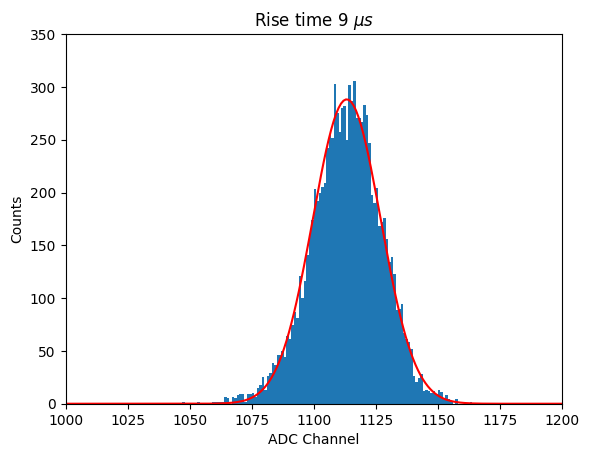

Peak value = 1113.38 ADC

Stdev = 13.68 $\pm$ 0.008 ADC

6. Rise time 10 $\mu s$

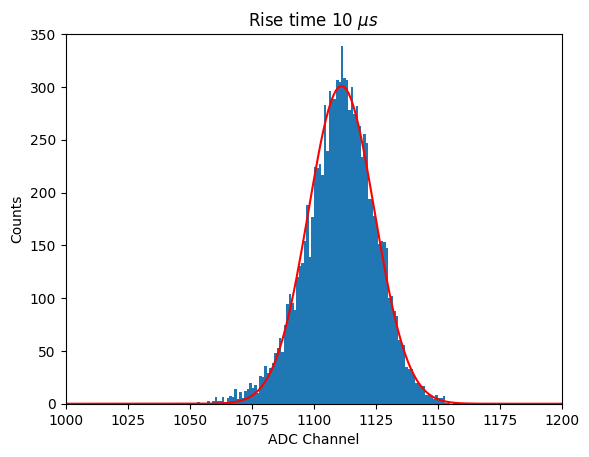

Peak value = 1111.33 ADC

Stdev = 13.32 $\pm$ 0.009 ADC

7. Rise time 11 $\mu s$

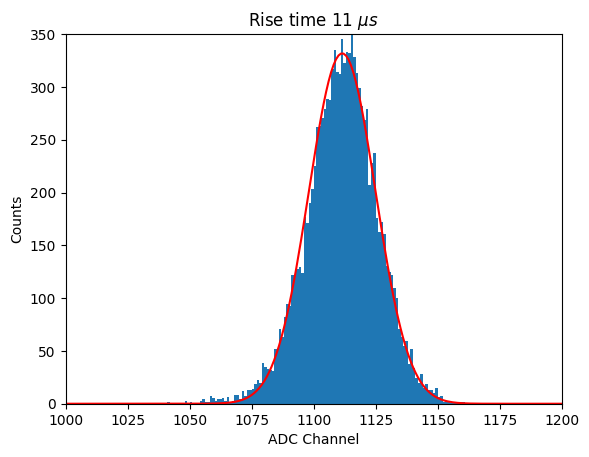

Peak value =  1111.51 ADC

Stdev = 13.43 $\pm$ 0.007 ADC

8. Rise time 12 $\mu s$

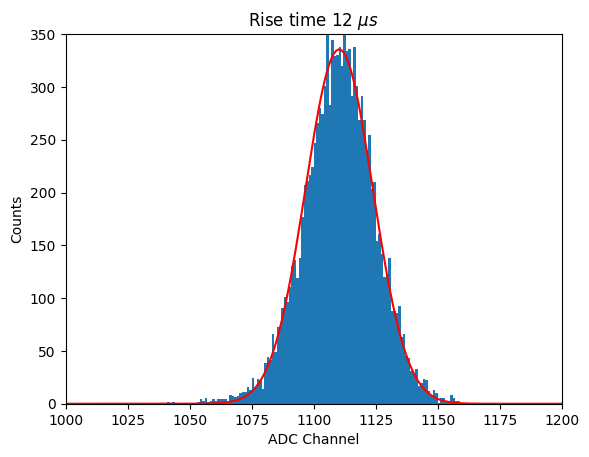

Mean value = 1110.27 ADC

Stdev = 13.58 $\pm$ 0.008 ADC

9. Rise time 13 $\mu s$

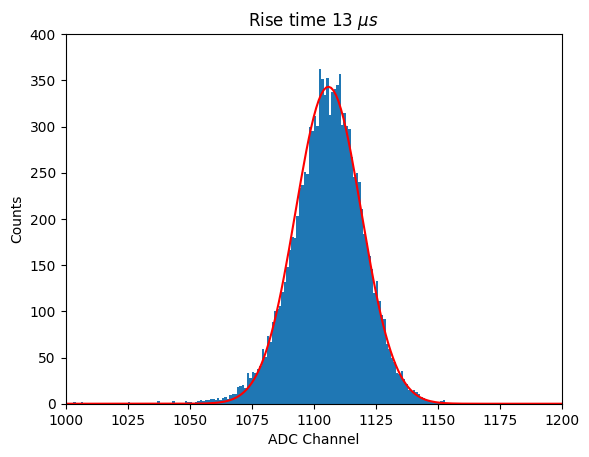

Mean value = 1105.95 ADC

Stdev = 13.25 $\pm$ 0.006 ADC


In [182]:
# Converting from ADC to energy units
peak_val = 1111.51
sq_amp = 55.2e-3
peak_val_energy = 1e-12 * sq_amp/11 * 25 * 1/1.6e-19 * 1e-6 # in eV
conv_factor = peak_val_energy/peak_val
print(2.35*13.43*conv_factor*1e3)
print(12*0.45)

22.263678362195247
5.4


In [ ]:
FWHM_energy_array = [, 22.26, 22.54, 22.08]

## Analog shaper

In [1]:
st3us = "mip test 12_4_24/10pF C_D/amp52_8mV_st3_10pF_board100_dig2-usb22575_CH1_20240412164946-12.txt"
st6us = "mip test 12_4_24/10pF C_D/amp52_8mV_st6_10pF_board100_dig2-usb22575_CH1_20240412165257-14.txt"
st10us = "mip test 12_4_24/10pF C_D/amp52_8mV_st10_10pF_board100_dig2-usb22575_CH1_20240412165730-19.txt"

In [2]:
filenames = [st3us, st6us, st10us]
lengths = []

for name in filenames:
    file = open(name, "r")
    length = len(file.readlines())
    lengths.append(length)
    file.close()

In [3]:
ind = 0
peaks = []
noise_list = []
for num in range(1, lengths[ind]):
    if num % 5 == 0:
        data = np.loadtxt(filenames[ind], skiprows=num-1, max_rows=1)
        noise = data[15000:]
        peak = max(data)
        peaks.append(peak)
        noise_list.append(noise)
        plt.plot(data)
    else:
        pass

peaks = np.array(peaks)
print(len(peaks))
plt.vlines(15000, -20, 1500)
plt.show()

noise_array = np.array(noise_list)
print(max(noise_array.flatten()) - min(noise_array.flatten()))

NameError: name 'np' is not defined

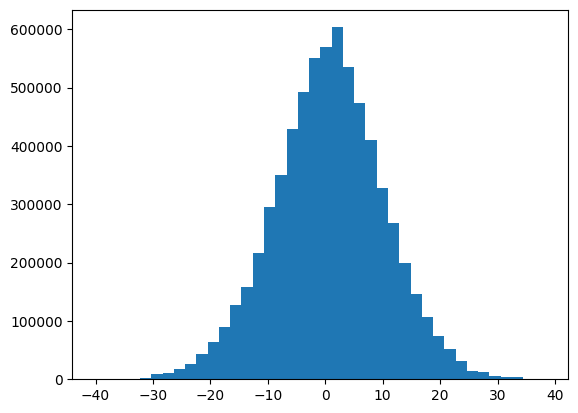

In [207]:
bin_num = 40
n, b, p = plt.hist(noise_array.flatten(), bins=bin_num)

In [208]:
popt, pcov = curve_fit(Gauss, b[0:len(n)], n, p0=[600000, 0, 10])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

[ 5.68652891e+05 -1.81171262e-01  9.12805332e+00]
[4.54226648e+03 8.41928934e-02 8.41929583e-02]


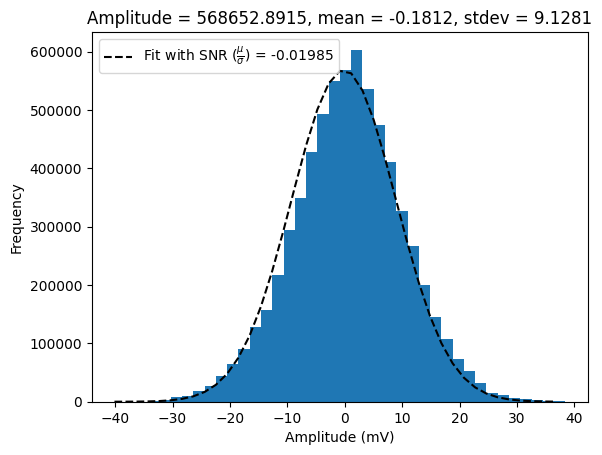

In [209]:
plt.plot(b[0:len(n)], Gauss(b[0:len(n)], *popt), "--", color="black", label=r"Fit with SNR ($\frac{\mu}{\sigma}$) = %.05f" % (popt[1]/popt[2]))
n2, b2, p2 = plt.hist(noise_array.flatten(), bins=b)
plt.title("Amplitude = %.04f, mean = %.04f, stdev = %.04f" % (popt[0], popt[1], popt[2]))
plt.xlabel("Amplitude (mV)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [210]:
amp = 55.2e-3
C_inj = 1e-12
energy_of_sq = C_inj * amp/11 * 25/(1.6e-19) * 1e-6
conv_factor = energy_of_sq/np.mean(peaks)

print(popt[2]*2.35*conv_factor*1e3)
print(perr[2]*2.35*conv_factor*1e3)

12.654347614844179
0.11671787222462172


#### Analog shaper baseline results

1. Shaping time 3 $\mu s$

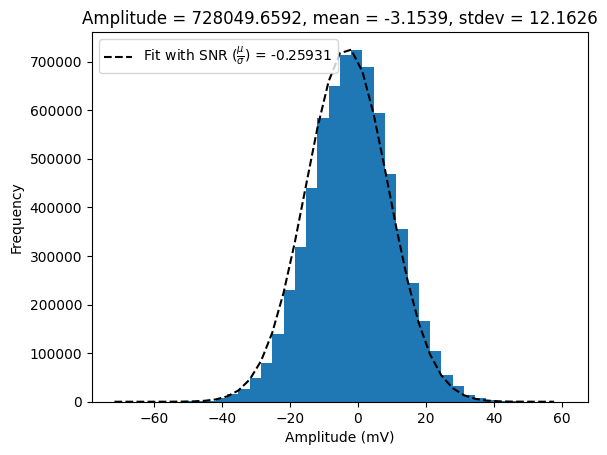

FWHM = 16.54 $\pm$ 0.067 keV

2. Shaping time 6 $\mu s$

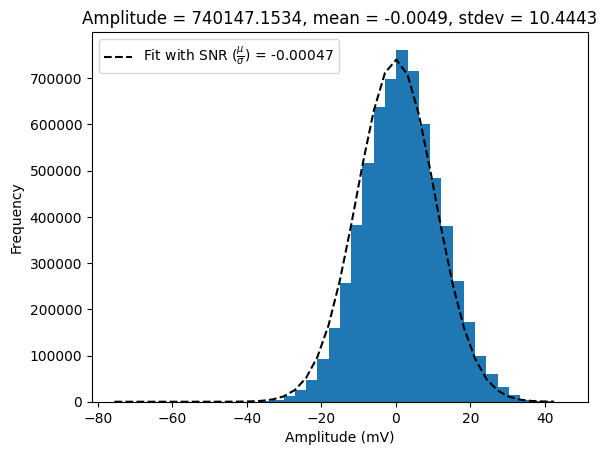

FWHM = 14.75 $\pm$ 0.087 keV

3. Shaping time 10 $\mu s$

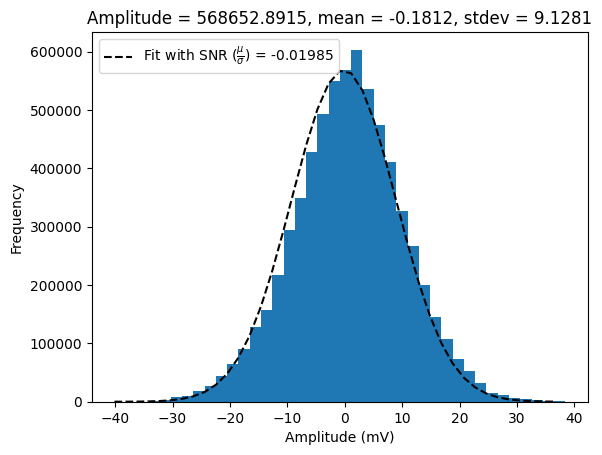

FWHM = 12.65 $\pm$ 0.117 keV

## Changing $C_{det}$ from 50 pF to 10 pF

##### Note: We added the 10 pF capacitor to the old injection board that we used to get the 10 keV result (which was then noisy after I resoldered the 50 pF on)

In [6]:
st3us = "mip test 12_4_24/Analog Shaper/amp55_2mV_st3_board100_dig2-usb22575_CH1_20240412144601-04.txt"
st6us = "mip test 12_4_24/Analog Shaper/amp55_2mV_st6_board100_dig2-usb22575_CH1_20240412145256-06.txt"
st10us = "mip test 12_4_24/Analog Shaper/amp55_2mV_st10_board100_dig2-usb22575_CH1_20240412145718-08.txt"

In [7]:
filenames = [st3us, st6us, st10us]
lengths = []

for name in filenames:
    file = open(name, "r")
    length = len(file.readlines())
    lengths.append(length)
    file.close()

112


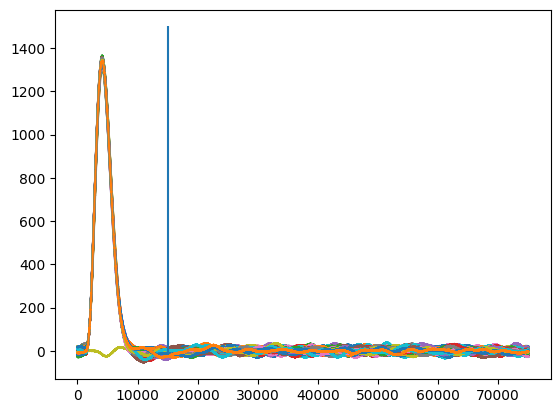

78.523


In [18]:
ind = 2
peaks = []
noise_list = []
for num in range(1, lengths[ind]):
    if num % 5 == 0:
        data = np.loadtxt(filenames[ind], skiprows=num-1, max_rows=1)
        noise = data[15000:]
        peak = max(data)
        peaks.append(peak)
        noise_list.append(noise)
        plt.plot(data)
    else:
        pass

peaks = np.array(peaks)
print(len(peaks))
plt.vlines(15000, -20, 1500)
plt.show()

noise_array = np.array(noise_list)
print(max(noise_array.flatten()) - min(noise_array.flatten()))

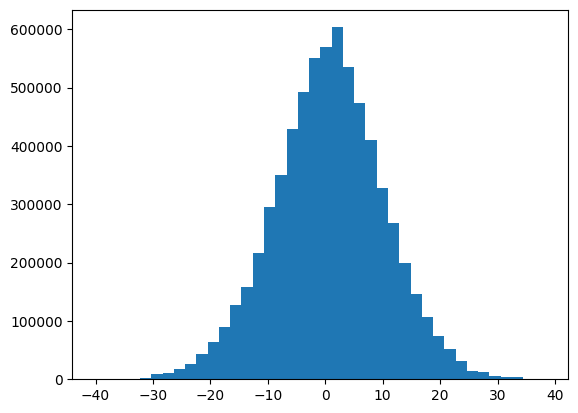

In [19]:
bin_num = 40
n, b, p = plt.hist(noise_array.flatten(), bins=bin_num)

In [20]:
popt, pcov = curve_fit(Gauss, b[0:len(n)], n, p0=[600000, 0, 10])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

[ 5.68652891e+05 -1.81171262e-01  9.12805332e+00]
[4.54226648e+03 8.41928934e-02 8.41929583e-02]


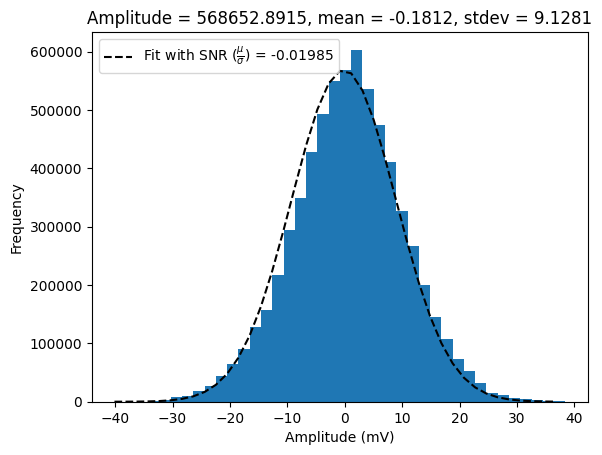

In [21]:
plt.plot(b[0:len(n)], Gauss(b[0:len(n)], *popt), "--", color="black", label=r"Fit with SNR ($\frac{\mu}{\sigma}$) = %.05f" % (popt[1]/popt[2]))
n2, b2, p2 = plt.hist(noise_array.flatten(), bins=b)
plt.title("Amplitude = %.04f, mean = %.04f, stdev = %.04f" % (popt[0], popt[1], popt[2]))
plt.xlabel("Amplitude (mV)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [22]:
amp = 52.8e-3
C_inj = 1e-12
energy_of_sq = C_inj * amp/11 * 25/(1.6e-19) * 1e-6
conv_factor = energy_of_sq/np.mean(peaks)

print(popt[2]*2.35*conv_factor*1e3)
print(perr[2]*2.35*conv_factor*1e3)

12.104158588111822
0.11164318212789903


#### Analog shaper baseline results (WITH 10 pF)

1. Shaping time 3 $\mu s$

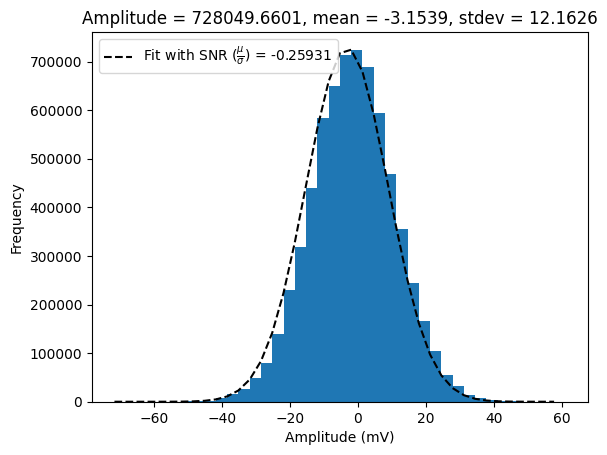

FWHM = 15.82 $\pm$ 0.064 keV

2. Shaping time 6 $\mu s$

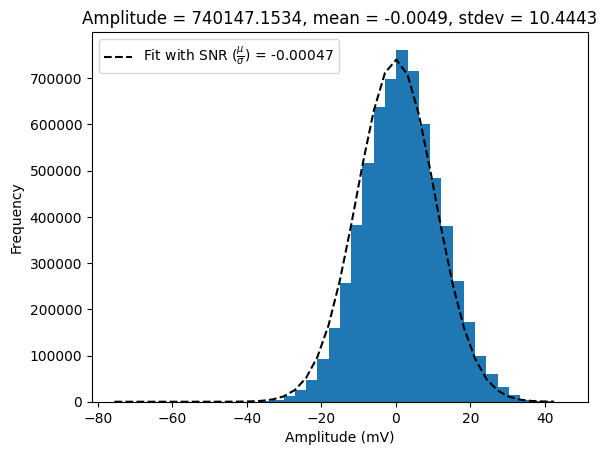

FWHM = 14.11 $\pm$ 0.083 keV

3. Shaping time 10 $\mu s$

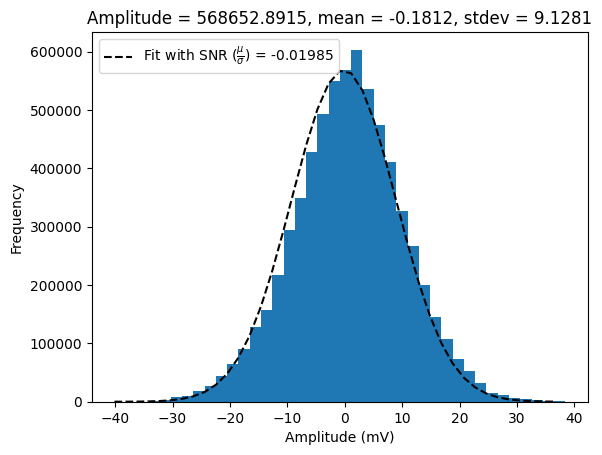

FWHM = 12.10 $\pm$ 0.112 keV

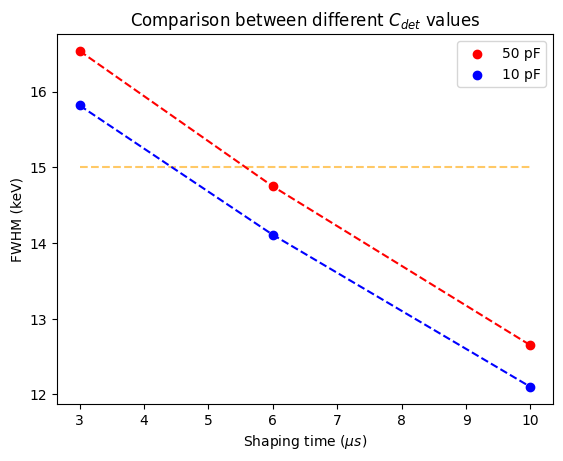

In [25]:
# plotting C_det changes
C_50 = [16.54, 14.75, 12.65]
C_50_err = [0.067, 0.087, 0.117]
C_10 = [15.82, 14.11, 12.10]
C_10_err = [0.064, 0.083, 0.112]
time = [3, 6, 10]

plt.hlines(15, 3, 10, ls="--", color="orange", alpha=0.6)
plt.scatter(time, C_50, label="50 pF", color="red")
plt.scatter(time, C_10, label="10 pF", color="blue")
plt.plot(time, C_50, ls="--", color="red")
plt.plot(time, C_10, ls="--", color="blue")
plt.title(r"Comparison between different $C_{det}$ values")
plt.xlabel(r"Shaping time ($\mu s$)")
plt.ylabel("FWHM (keV)")
plt.legend()

### 10 pF $C_{det}$ with different amplitude

In [5]:
st3 = "mip test 12_4_24/10pF C_D diff input amplitude/Amp80_8mV_st3us_10pF_Board100_dig2-usb22575_CH1_20240412175234-17.txt"
st6 = "mip test 12_4_24/10pF C_D diff input amplitude/Amp80_8mV_st6us_10pF_Board100_dig2-usb22575_CH1_20240412175948-25.txt"
st10 = "mip test 12_4_24/10pF C_D diff input amplitude/Amp80_8mV_st10us_10pF_Board100_dig2-usb22575_CH1_20240412180459-28.txt"

In [6]:
filenames = [st3, st6, st10]
lengths = []

for name in filenames:
    file = open(name, "r")
    length = len(file.readlines())
    lengths.append(length)
    file.close()

111


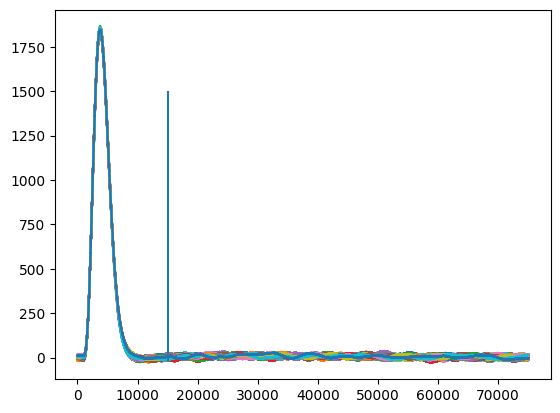

65.813


In [18]:
ind = 2
peaks = []
noise_list = []
for num in range(1, lengths[ind]):
    if num % 5 == 0:
        data = np.loadtxt(filenames[ind], skiprows=num-1, max_rows=1)
        noise = data[15000:]
        peak = max(data)
        peaks.append(peak)
        noise_list.append(noise)
        plt.plot(data)
    else:
        pass

peaks = np.array(peaks)
print(len(peaks))
plt.vlines(15000, -20, 1500)
plt.show()

noise_array = np.array(noise_list)
print(max(noise_array.flatten()) - min(noise_array.flatten()))

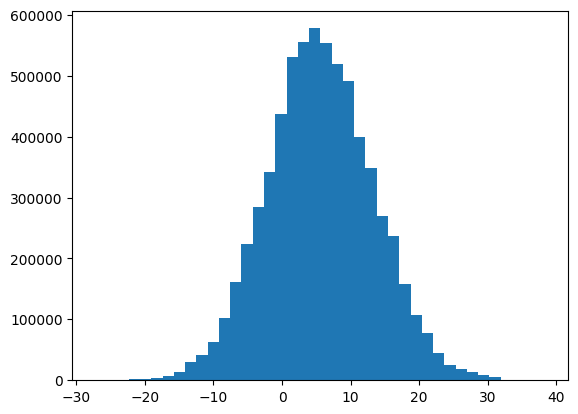

In [19]:
bin_num = 40
n, b, p = plt.hist(noise_array.flatten(), bins=bin_num)

In [20]:
popt, pcov = curve_fit(Gauss, b[0:len(n)], n, p0=[600000, 0, 10])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

[5.69273023e+05 4.61952346e+00 7.66082305e+00]
[4.48978401e+03 6.97669729e-02 6.97669989e-02]


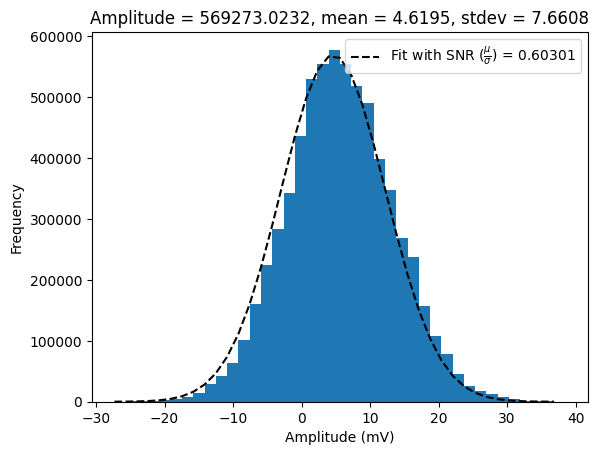

In [21]:
plt.plot(b[0:len(n)], Gauss(b[0:len(n)], *popt), "--", color="black", label=r"Fit with SNR ($\frac{\mu}{\sigma}$) = %.05f" % (popt[1]/popt[2]))
n2, b2, p2 = plt.hist(noise_array.flatten(), bins=b)
plt.title("Amplitude = %.04f, mean = %.04f, stdev = %.04f" % (popt[0], popt[1], popt[2]))
plt.xlabel("Amplitude (mV)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [22]:
amp = 80.8e-3
C_inj = 1e-12
energy_of_sq = C_inj * amp/11 * 25/(1.6e-19) * 1e-6
conv_factor = energy_of_sq/np.mean(peaks)

print(popt[2]*2.35*conv_factor*1e3)
print(perr[2]*2.35*conv_factor*1e3)

11.184828150335548
0.1018600596016541


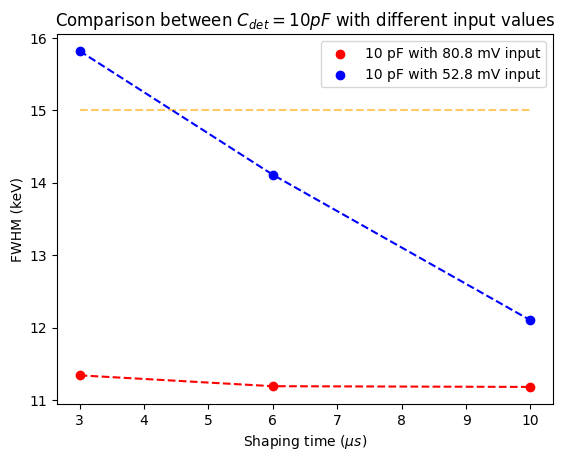

In [25]:
# plotting C_det changes
C_10 = [15.82, 14.11, 12.10]
C_10_err = [0.064, 0.083, 0.112]
C_10_new = [11.34, 11.19, 11.18]
C_10_new_err = [0.048, 0.075, 0.102]
time = [3, 6, 10]

plt.hlines(15, 3, 10, ls="--", color="orange", alpha=0.6)
plt.scatter(time, C_10_new, label="10 pF with 80.8 mV input", color="red")
plt.scatter(time, C_10, label="10 pF with 52.8 mV input", color="blue")
plt.plot(time, C_10_new, ls="--", color="red")
plt.plot(time, C_10, ls="--", color="blue")
plt.title(r"Comparison between $C_{det} = 10pF$ with different input values")
plt.xlabel(r"Shaping time ($\mu s$)")
plt.ylabel("FWHM (keV)")
plt.legend()